In [1]:
import pandas as pd
import numpy as np

In [37]:
import requests
import json

# Define the API endpoint and parameters
url = "https://data.ca.gov/api/3/action/datastore_search"
params = {
    "resource_id": "d599c3d3-87af-4e8c-8694-9c01f49e3d93",  # Unique identifier for the dataset
    "limit": 5000000  # Number of records to retrieve
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check if the request was successful
if data["success"]:
    records = data["result"]["records"]
    # Print the first record to inspect
    print(records[0])
else:
    print("Failed to retrieve data.")


{'_id': 1, 'Date': '12/31/2023', 'ZIP Code': '91302', 'Model Year': '<2010', 'Fuel': 'Unk', 'Make': 'OTHER/UNK', 'Duty': 'Unk', 'Vehicles': '490'}


In [38]:
len(data['result']['records'])

50000

In [39]:
dwnld = pd.read_csv("vehicle-fuel-type-count-by-zip-code-20231.csv")

In [43]:
df = dwnld.copy()
df.head()

,Date,ZIP Code,Model Year,Fuel,Make,Duty,Vehicles
0,12/31/2023,91302,<2010,Unk,OTHER/UNK,Unk,490
1,12/31/2023,93631,<2010,Unk,OTHER/UNK,Unk,414
2,12/31/2023,90603,<2010,Unk,OTHER/UNK,Unk,504
3,12/31/2023,93561,<2010,Unk,OTHER/UNK,Unk,778
4,12/31/2023,94505,<2010,Unk,OTHER/UNK,Unk,387


In [48]:
df['ZIP Code'].nunique()

4782

In [50]:
df['Fuel'].unique()

array(['Unk', 'Diesel and Diesel Hybrid', 'Gasoline', 'Natural Gas',
       'Hybrid Gasoline', 'Flex-Fuel', 'Other', 'Battery Electric',
       'Plug-in Hybrid', 'Hydrogen Fuel Cell'], dtype=object)

In [52]:
evdf = df[df['Fuel']=="Battery Electric"]
evdf.shape

(32505, 7)

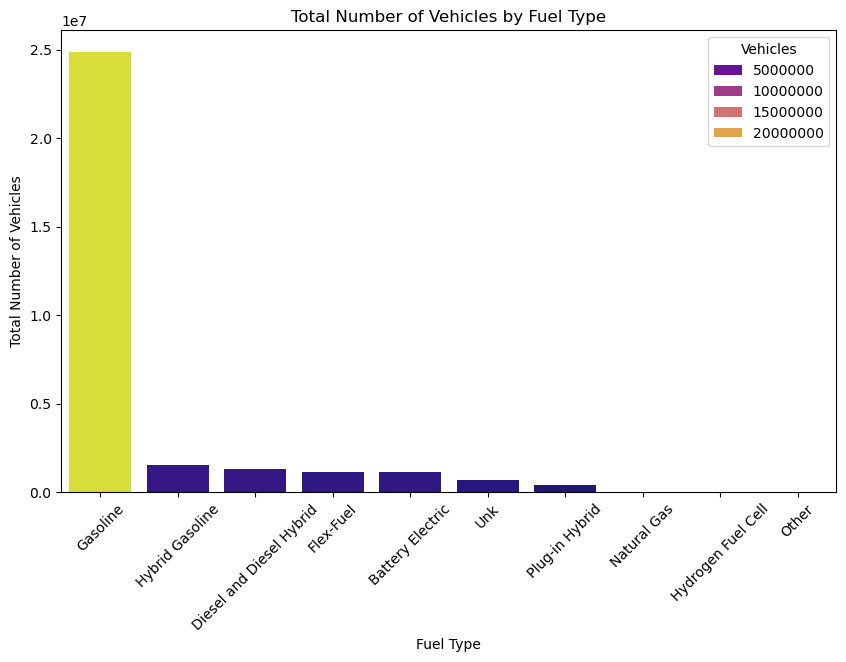

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fuel_totals = df.groupby('Fuel')['Vehicles'].sum().reset_index()
fuel_totals = fuel_totals.sort_values(by='Vehicles', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_totals, x='Fuel', y='Vehicles', palette='plasma', hue='Vehicles')
plt.xlabel('Fuel Type')
plt.ylabel('Total Number of Vehicles')
plt.title('Total Number of Vehicles by Fuel Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

In [66]:
ndf = df[(df['Model Year']!="<2010") & (df['Model Year']!="Unk")]

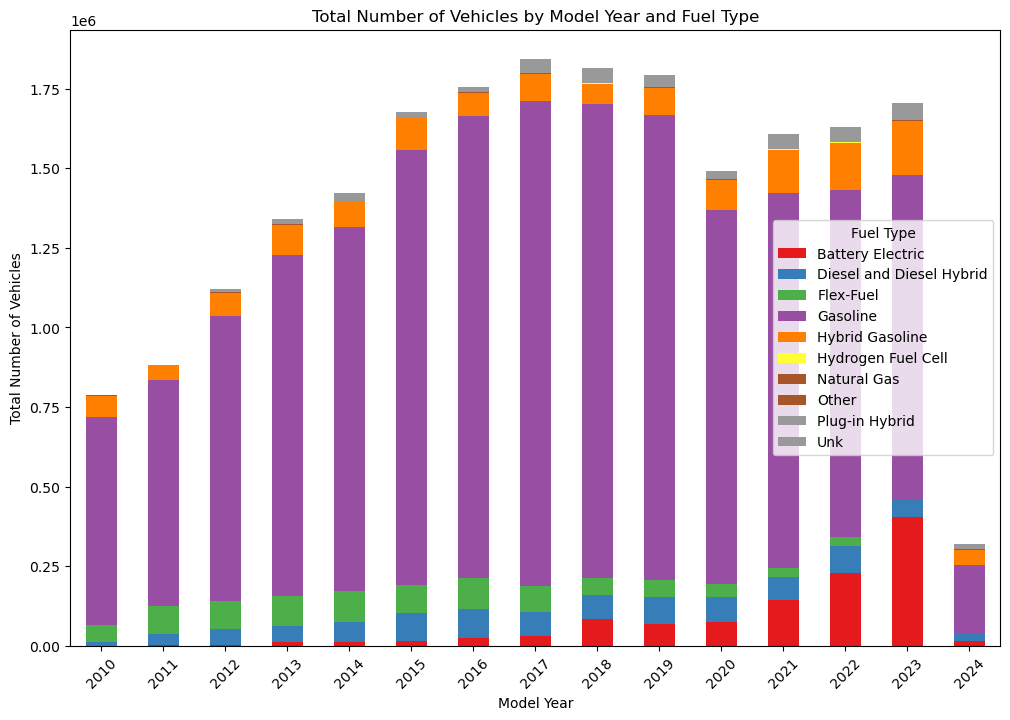

In [77]:
# Group 'Vehicles' by 'Model Year' by 'Fuel'
hevs_summary = ndf.groupby(['Model Year', 'Fuel'])['Vehicles'].sum().unstack()

hevs_summary.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.xlabel('Model Year')
plt.ylabel('Total Number of Vehicles')
plt.title('Total Number of Vehicles by Model Year and Fuel Type')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)

plt.show()

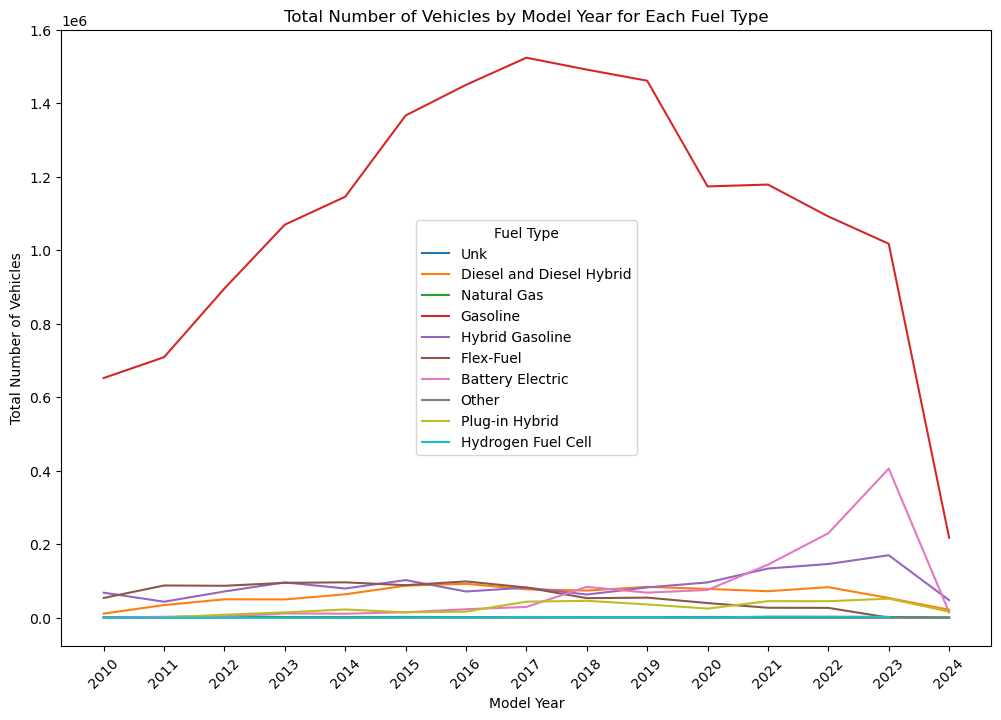

In [68]:
# Plot a line chart
plt.figure(figsize=(12, 8))
for fuel_type in ndf['Fuel'].unique():
    subset = ndf[ndf['Fuel'] == fuel_type]
    yearly_totals = subset.groupby('Model Year')['Vehicles'].sum()
    plt.plot(yearly_totals.index, yearly_totals.values, label=fuel_type)
plt.xlabel('Model Year')
plt.ylabel('Total Number of Vehicles')
plt.title('Total Number of Vehicles by Model Year for Each Fuel Type')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)

plt.show()

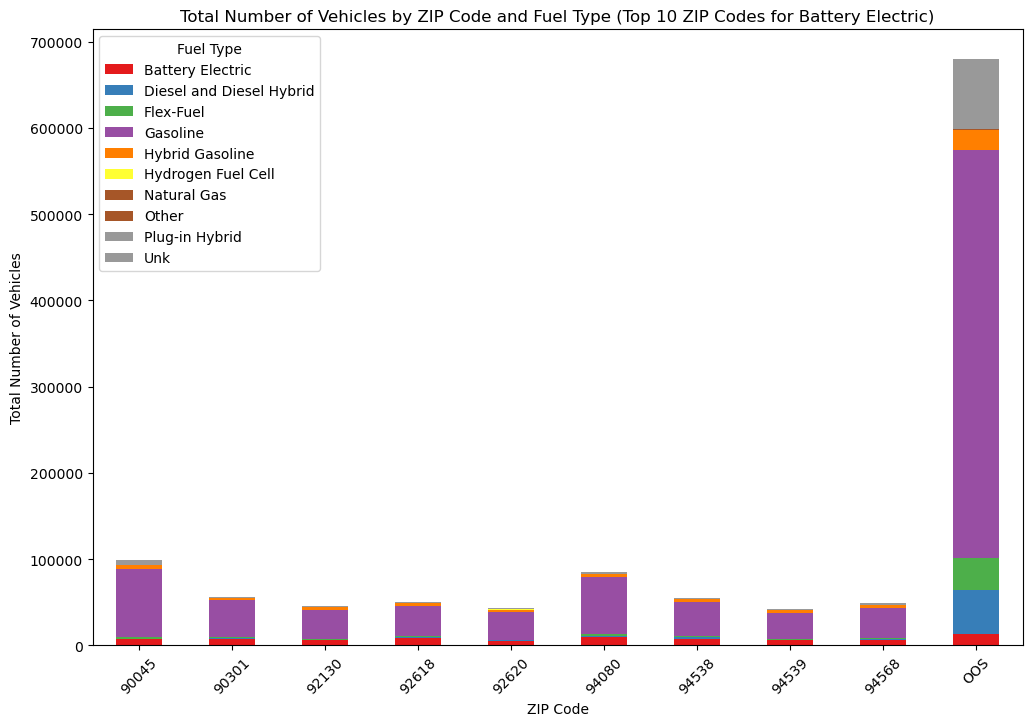

In [87]:
# Get top 10 zip codes by battery electric vehicles
battery_electric = df[df['Fuel'] == "Battery Electric"]
top_zip_codes = battery_electric.groupby('ZIP Code')['Vehicles'].sum().nlargest(10).index
top_hevs = df[df['ZIP Code'].isin(top_zip_codes)]
zip_fuel_summary = top_hevs.groupby(['ZIP Code', 'Fuel'])['Vehicles'].sum().unstack()

# Plot
zip_fuel_summary.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.xlabel('ZIP Code')
plt.ylabel('Total Number of Vehicles')
plt.title('Total Number of Vehicles by ZIP Code and Fuel Type (Top 10 ZIP Codes for Battery Electric)')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)

plt.show()